In [2]:
import numpy as np
import csv
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import scipy.optimize as opt

def convert_names(name): # converts the names from last, first to first last
  parts = name.split(',') #split the name into parts
  return (parts[1] + ' ' + parts[0]).lstrip() #return the first and last name
#defines a dictionary for the players and their stats
players = {'name': [], 'bs':[],'sq':[], 'hh':[], 'iso':[], 'cpr':[], 'wpa':[], 'roba':[], 'war':[], 'wrc':[], 'or':[]}

df = pd.read_csv('iso.csv') #use pandas to read csv file of data
dic1 = {'name':[], 'hh':[], 'iso':[], 'wpa':[], 'roba':[]} #create a temporary dictionary to hold the data
for row in df.iterrows(): #iterate through each row of the csv file
  dic1['name'].append(row[1][1]) #add the player name to the dictionary
  dic1['hh'].append(row[1][3]) #add the hard hit percentage to the dictionary
  dic1['iso'].append(row[1][2]) #add the iso to the dictionary
  dic1['wpa'].append(row[1][4]) #add the win probability added to the dictionary
  dic1['roba'].append(row[1][5]) #add the run value added to the dictionary

bt = pd.read_csv('bat-tracking.csv') #use pandas to read csv file of data
dic2 = {'name':[], 'bs':[], 'sq':[]} #create a temporary dictionary to hold the data
for row in bt.iterrows(): #iterate through each row of the csv file
  dic2['name'].append(convert_names(row[1][1])) #add the player name to the temporary dictionary
  dic2['bs'].append(row[1][5]) #add the bat speed to the temporary dictionary
  dic2['sq'].append(row[1][8]) #add the squared up contact to the temporary dictionary

bl = pd.read_csv('war.csv') #use pandas to read csv file of data
dic3 = {'name':[], 'war':[], 'wrc':[]} #create a temporary dictionary to hold the data
for row in bl.iterrows(): #iterate through each row of the csv file
  dic3['name'].append(row[1][1]) #add the player name to the temporary dictionary
  dic3['war'].append(row[1][22]) #add the war to the temporary dictionary
  dic3['wrc'].append(row[1][18]) #add the wrc to the temporary dictionary

temp = {'name':[], 'bs':[], 'sq':[], 'hh':[], 'iso':[], 'wpa':[], 'roba':[]} #create a temporary dictionary to hold the data
for i in range(len(dic2['name'])): #iterate through each player in the temporary dictionary
  if dic2['name'][i] in dic1['name']: #if the player is in the dictionary
    index = dic1['name'].index(dic2['name'][i]) #get the index of the player
    temp['name'].append(dic2['name'][i]) #add the player name to the players dictionary
    temp['bs'].append(dic2['bs'][i]) #add the bat speed to the players dictionary
    temp['sq'].append(dic2['sq'][i]) #add the squared up contact to the players dictionary
    temp['hh'].append(dic1['hh'][index]) #add the hard hit percentage to the players dictionary
    temp['iso'].append(dic1['iso'][index]) #add the iso to the players dictionary
    temp['wpa'].append(dic1['wpa'][index]) #add the win probability added to the players dictionary
    temp['roba'].append(dic1['roba'][index]) #add the run value added to the players dictionary

for i in range(len(dic3['name'])): #iterate through each player in the temporary dictionary
  if dic3['name'][i] in temp['name']: #if the player is in the temporary dictionary
    index = temp['name'].index(dic3['name'][i]) #get the index of the player
    players['name'].append(temp['name'][index]) #add the player name to the players dictionary
    players['bs'].append(temp['bs'][index]) #add the bat speed to the players
    players['sq'].append(temp['sq'][index]) #add the squared up contact to the players dictionary
    players['hh'].append(temp['hh'][index]) #add the hard hit percentage to the players dictionary
    players['iso'].append(temp['iso'][index]) #add the iso to the players
    players['wpa'].append(temp['wpa'][index]) #add the win probability added to the players dictionary
    players['roba'].append(temp['roba'][index]) #add the run value added to the players dictionary
    players['war'].append(dic3['war'][i]) #add the war to the players dictionary
    players['wrc'].append(dic3['wrc'][i]) #add the wrc to the players dictionary

for i in range(len(players['name'])): #iterate through each player in the players dictionary
  players['cpr'].append(((100*players['sq'][i]) + (0.01 * players['bs'][i])) / ((100*players['iso'][i]) + players['hh'][i]))
  players['or'].append((0.35 * players['war'][i]) + (0.3 * players['wrc'][i]) + (0.25 * players['roba'][i]) + (0.1 * players['wpa'][i])) #add the offensive rating to the players dictionary

for i in range(len(players['or'])): #iterate through each player in the players dictionary
  for j in range(i+1, len(players['or'])): #iterate through each player in the players dictionary
    if players['or'][i] > players['or'][j]: #if the cpr of the first player is greater than the cpr of the second player
      (players['cpr'][i], players['cpr'][j]) = (players['cpr'][j], players['cpr'][i]) #swap the cpr of the two players
      (players['bs'][i], players['bs'][j]) = (players['bs'][j], players['bs'][i]) #swap the bat speed of the two players
      (players['sq'][i], players['sq'][j]) = (players['sq'][j], players['sq'][i]) #swap the squared up contact of the two players
      (players['hh'][i], players['hh'][j]) = (players['hh'][j], players['hh'][i]) #swap the squared up contact of the two players
      (players['iso'][i], players['iso'][j]) = (players['iso'][j], players['iso'][i]) #swap the squared up contact of the two players
      (players['name'][i], players['name'][j]) = (players['name'][j], players['name'][i]) #swap the squared up contact of the two players
      (players['wpa'][i], players['wpa'][j]) = (players['wpa'][j], players['wpa'][i]) #swap the squared up contact of the two players
      (players['roba'][i], players['roba'][j]) = (players['roba'][j], players['roba'][i]) #swap the squared up contact of the two players
      (players['war'][i], players['war'][j]) = (players['war'][j], players['war'][i]) #swap the squared up contact of the two players
      (players['wrc'][i], players['wrc'][j]) = (players['wrc'][j], players['wrc'][i]) #swap the squared up contact of the two players
      (players['or'][i], players['or'][j]) = (players['or'][j], players['or'][i]) #swap the squared up contact of the two players

print(players['name'])


['Maikel Garcia', 'Orlando Arcia', 'Bryan De La Cruz', 'Ceddanne Rafaela', 'Christopher Morel', 'Leody Taveras', 'Zack Gelof', 'Alex Verdugo', 'Andrés Giménez', 'Sal Frelick', 'Jake Meyers', 'Jacob Young', 'Brendan Rodgers', 'Brice Turang', 'Anthony Volpe', 'Bryson Stott', 'Adolis García', 'Ty France', 'Ryan McMahon', 'Andrew Benintendi', 'George Springer', 'Andrew Vaughn', 'Spencer Steer', 'Colt Keith', 'Ezequiel Tovar', 'Lane Thomas', 'Rhys Hoskins', 'Josh Bell', 'Paul Goldschmidt', 'Brenton Doyle', 'Jesús Sánchez', 'Jeremy Peña', "Logan O'Hoppe", 'Daulton Varsho', 'Marcus Semien', 'Dansby Swanson', 'Nolan Schanuel', 'Nick Castellanos', 'Andrew McCutchen', 'Nolan Arenado', 'Gleyber Torres', 'Masyn Winn', 'Alec Burleson', 'Joey Ortiz', 'Adley Rutschman', 'Jake Burger', 'Jake Cronenworth', 'Nico Hoerner', 'CJ Abrams', 'Ryan Mountcastle', 'Vinnie Pasquantino', 'Matt Vierling', 'Lourdes Gurriel Jr.', 'Shea Langeliers', 'Jonathan India', 'Willi Castro', 'Cody Bellinger', 'Corbin Carroll',

<ipython-input-2-9fafa8d20d56>:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  dic1['name'].append(row[1][1]) #add the player name to the dictionary
<ipython-input-2-9fafa8d20d56>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  dic1['hh'].append(row[1][3]) #add the hard hit percentage to the dictionary
<ipython-input-2-9fafa8d20d56>:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  dic1['iso'].append(row[1][2]) #add the iso to t

In [3]:
define = pd.DataFrame(players)
new_column_names = {'name': 'Player Name', 'bs': 'Bat Speed', 'sq': 'Squared Up Swing', 'hh': 'Hard Hit %', 'iso': 'Isolated Power', 'cpr': 'Contact to Power Ratio'}
define = define.rename(columns=new_column_names)
print(define[['Player Name', 'Bat Speed', 'Squared Up Swing', 'Hard Hit %', 'Isolated Power', 'Contact to Power Ratio']].tail(20))

               Player Name  Bat Speed  Squared Up Swing  Hard Hit %  \
107          Rafael Devers  72.535231          0.232904        52.9   
108         Kyle Schwarber  77.539452          0.229376        55.5   
109           Riley Greene  74.644942          0.226695        47.1   
110        Freddie Freeman  69.761057          0.276746        41.8   
111           Seiya Suzuki  72.961616          0.257042        49.3   
112       Jurickson Profar  71.697107          0.270138        44.4   
113           Corey Seager  72.288889          0.261239        50.9   
114           Mookie Betts  69.113249          0.358311        39.5   
115       Francisco Lindor  72.342863          0.286416        47.5   
116           Bryce Harper  74.070122          0.210480        48.4   
117            Ketel Marte  73.683730          0.305523        53.9   
118          Marcell Ozuna  73.996119          0.230904        53.7   
119       Gunnar Henderson  76.257744          0.250887        54.0   
120   

In [4]:
effect = pd.DataFrame(players)
new_column_names = {'name': 'Player Name','wpa': 'Win Probability Added', 'roba': 'Run Value Added', 'war': 'War', 'wrc': 'Weighted Runs Created +'}
effect = effect.rename(columns=new_column_names)
print(effect[['Player Name', 'Win Probability Added', 'Run Value Added', 'War', 'Weighted Runs Created +']])


           Player Name  Win Probability Added  Run Value Added   War  \
0        Maikel Garcia                   -2.4            0.287   1.1   
1        Orlando Arcia                   -3.7            0.278   0.8   
2     Bryan De La Cruz                   -1.5            0.290  -1.2   
3     Ceddanne Rafaela                   -1.3            0.299   0.9   
4    Christopher Morel                   -3.1            0.282  -1.0   
..                 ...                    ...              ...   ...   
122     Yordan Alvarez                    3.9            0.406   5.3   
123     Bobby Witt Jr.                    4.7            0.416  10.4   
124          Juan Soto                    5.9            0.424   8.1   
125      Shohei Ohtani                    7.1            0.449   9.1   
126        Aaron Judge                    6.1            0.484  11.2   

     Weighted Runs Created +  
0                         69  
1                         72  
2                         77  
3          

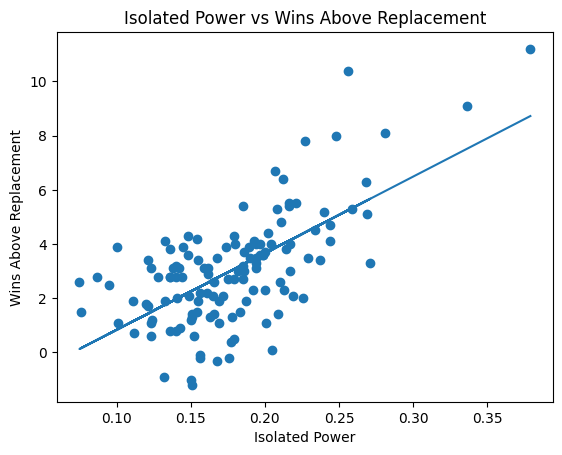

In [5]:
#create a scatter plot of iso vs war
a, b = np.polyfit(players['iso'], players['war'],1)
plt.scatter(players['iso'], players['war'])
x = np.array(players['iso'])
plt.plot(x, a*x+b)
plt.xlabel('Isolated Power')
plt.ylabel('Wins Above Replacement')
plt.title('Isolated Power vs Wins Above Replacement')
plt.show()

#strong correlation between high ISO and high WAR

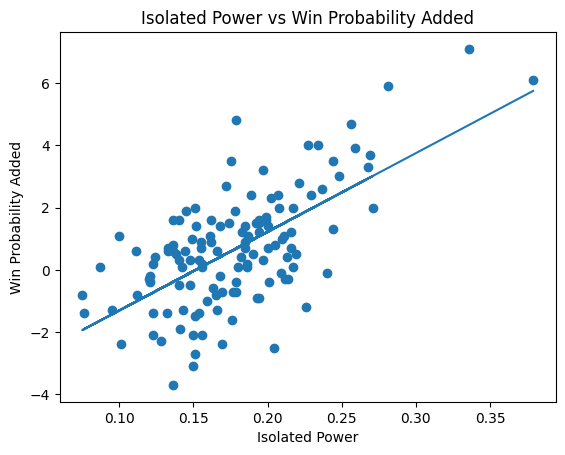

In [6]:
#create a scatter plot of iso vs wpa
a, b = np.polyfit(players['iso'], players['wpa'],1)
plt.scatter(players['iso'], players['wpa'])
x = np.array(players['iso'])
plt.plot(x, a*x+b)
plt.xlabel('Isolated Power')
plt.ylabel('Win Probability Added')
plt.title('Isolated Power vs Win Probability Added')
plt.show()

#strong correlation between high ISO and high WPA

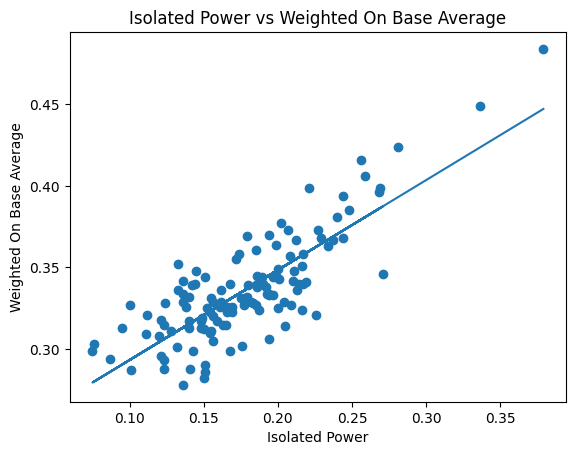

In [7]:
#create a scatter plot of iso vs roba
a, b = np.polyfit(players['iso'], players['roba'],1)
plt.scatter(players['iso'], players['roba'])
x = np.array(players['iso'])
plt.plot(x, a*x+b)
plt.xlabel('Isolated Power')
plt.ylabel('Weighted On Base Average')
plt.title('Isolated Power vs Weighted On Base Average')
plt.show()

#strong correlation between high ISO and high rOBA

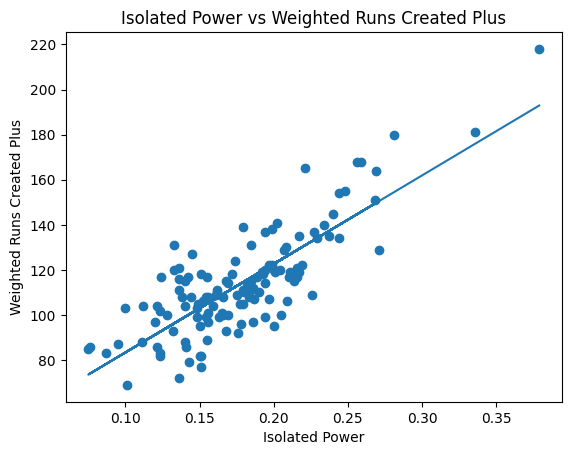

In [8]:
#create a scatter plot of iso vs wrc
a, b = np.polyfit(players['iso'], players['wrc'],1)
plt.scatter(players['iso'], players['wrc'])
x = np.array(players['iso'])
plt.plot(x, a*x+b)
plt.xlabel('Isolated Power')
plt.ylabel('Weighted Runs Created Plus')
plt.title('Isolated Power vs Weighted Runs Created Plus')
plt.show()

#strong correlation between high ISO and high wRC+

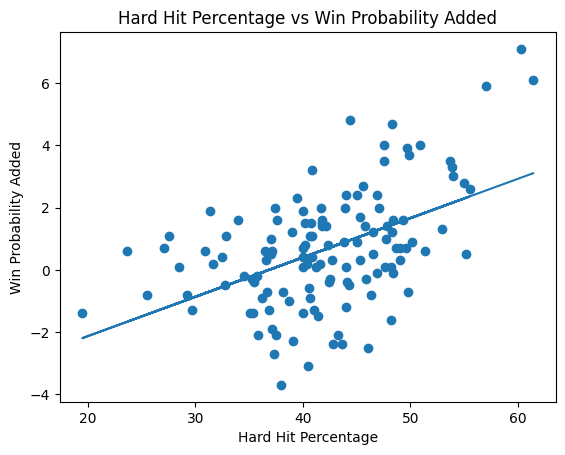

In [9]:
#create a scatter plot of hh vs win probability added
a, b = np.polyfit(players['hh'], players['wpa'],1)
x = np.array(players['hh'])
plt.scatter(players['hh'], players['wpa'])
plt.plot(x, a*x+b)
plt.xlabel('Hard Hit Percentage')
plt.ylabel('Win Probability Added')
plt.title('Hard Hit Percentage vs Win Probability Added')
plt.show()

#high HH% not necessarily higher win probability added

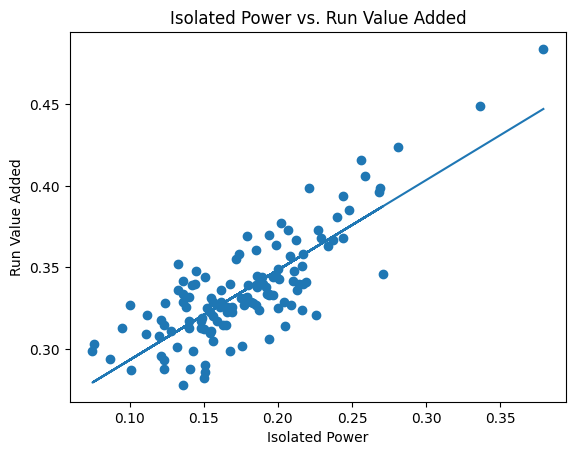

In [10]:
#create a scatter plot of iso vs run value added
a,b = np.polyfit(players['iso'], players['roba'],1)
x = np.array(players['iso'])
plt.scatter(players['iso'], players['roba'])
plt.plot(x, a*x+b)
plt.xlabel('Isolated Power')
plt.ylabel('Run Value Added')
plt.title('Isolated Power vs. Run Value Added')
plt.show()

#high ISO = higher run value

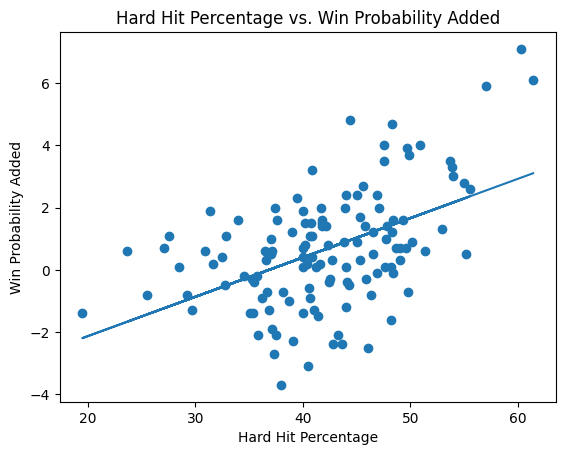

In [11]:
#create a scatter plot of hard hit percentage vs win probability added
a,b = np.polyfit(players['hh'], players['wpa'],1)
x = np.array(players['hh'])
plt.scatter(players['hh'], players['wpa'])
plt.plot(x, a*x+b)
plt.xlabel('Hard Hit Percentage')
plt.ylabel('Win Probability Added')
plt.title('Hard Hit Percentage vs. Win Probability Added')
plt.show()

#high hard hit percentage not necessarily higher win probability added

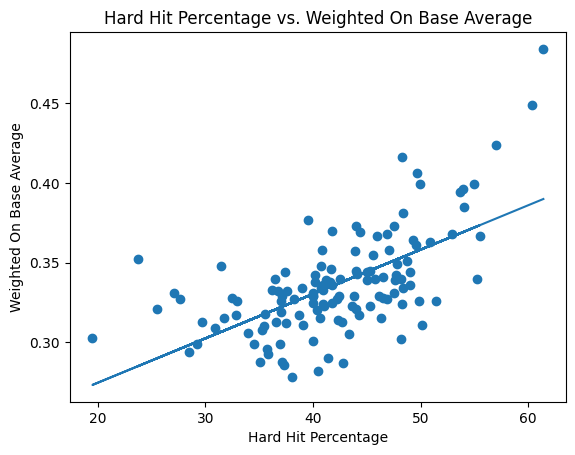

In [12]:
#create a scatter plot of hard hit percentage vs run value added
a,b = np.polyfit(players['hh'], players['roba'],1)
x = np.array(players['hh'])
plt.scatter(players['hh'], players['roba'])
plt.plot(x, a*x+b)
plt.xlabel('Hard Hit Percentage')
plt.ylabel('Weighted On Base Average')
plt.title('Hard Hit Percentage vs. Weighted On Base Average')
plt.show()

#high HH% not necessarily higher rOBA

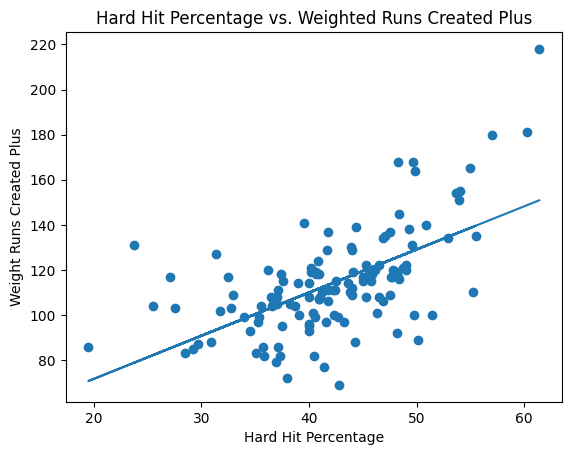

In [13]:
#create a scatter plot of HH% vs wRC+
a,b = np.polyfit(players['hh'], players['wrc'],1)
x = np.array(players['hh'])
plt.scatter(players['hh'], players['wrc'])
plt.plot(x, a*x+b)
plt.xlabel('Hard Hit Percentage')
plt.ylabel('Weight Runs Created Plus')
plt.title('Hard Hit Percentage vs. Weighted Runs Created Plus')
plt.show()

#high HH% not necessarily higher wRC+

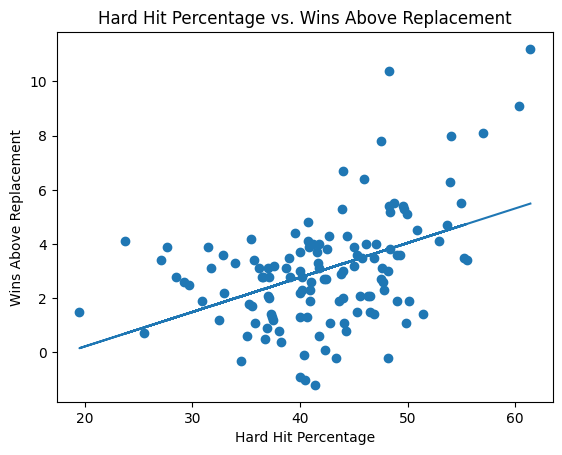

In [14]:
#create a scatter plot of HH% vs WAR
a,b = np.polyfit(players['hh'], players['war'],1)
x = np.array(players['hh'])
plt.scatter(players['hh'], players['war'])
plt.plot(x, a*x+b)
plt.xlabel('Hard Hit Percentage')
plt.ylabel('Wins Above Replacement')
plt.title('Hard Hit Percentage vs. Wins Above Replacement')
plt.show()

#high HH% not necessarily higher WAR

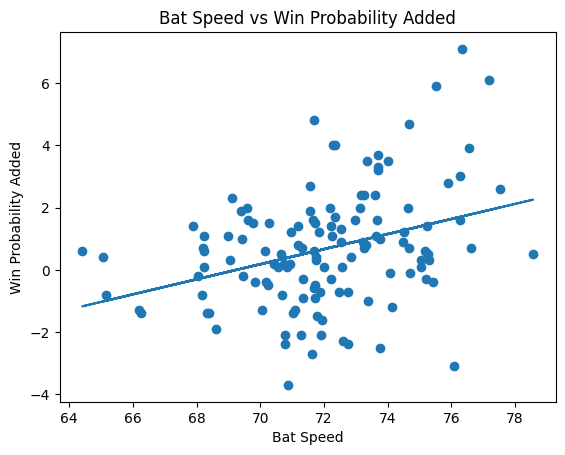

In [15]:
#create a scatter plot of BS vs WPA
a,b = np.polyfit(players['bs'], players['wpa'],1)
x = np.array(players['bs'])
plt.scatter(players['bs'], players['wpa'])
plt.plot(x, a*x+b)
plt.xlabel('Bat Speed')
plt.ylabel('Win Probability Added')
plt.title('Bat Speed vs Win Probability Added')
plt.show()

#high bat speed not necessarily higher WPA

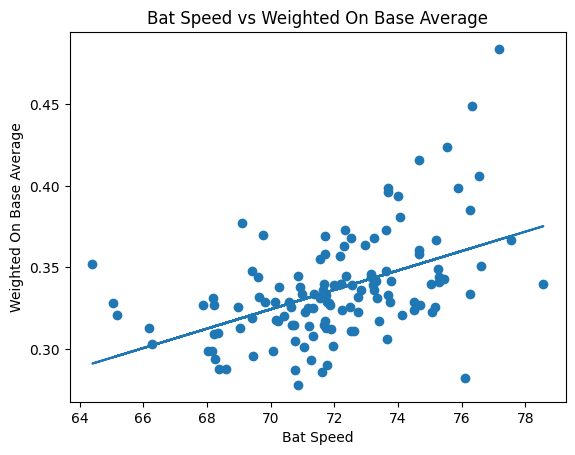

In [16]:
#create a scatter plot of BS vs rOBA
a,b = np.polyfit(players['bs'], players['roba'],1)
x = np.array(players['bs'])
plt.scatter(players['bs'], players['roba'])
plt.plot(x, a*x+b)
plt.xlabel('Bat Speed')
plt.ylabel('Weighted On Base Average')
plt.title('Bat Speed vs Weighted On Base Average')
plt.show()

#high bat speed not necessarily higher rOBA

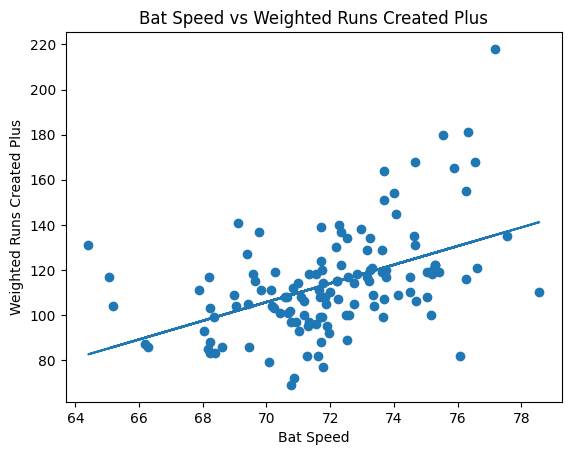

In [17]:
#create a scatter plot of BS vs wRC+
a,b = np.polyfit(players['bs'], players['wrc'],1)
x = np.array(players['bs'])
plt.scatter(players['bs'], players['wrc'])
plt.plot(x, a*x+b)
plt.xlabel('Bat Speed')
plt.ylabel('Weighted Runs Created Plus')
plt.title('Bat Speed vs Weighted Runs Created Plus')
plt.show()

#high bat speed not necessarily higher wRC+

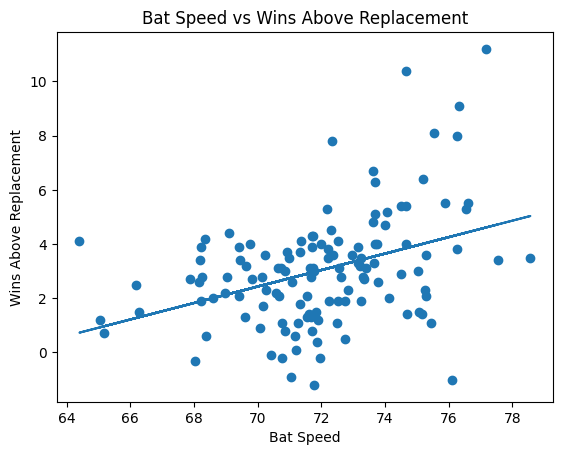

In [18]:
#create a scatter plot of BS vs WAR
a,b = np.polyfit(players['bs'], players['war'],1)
x = np.array(players['bs'])
plt.scatter(players['bs'], players['war'])
plt.plot(x, a*x+b)
plt.xlabel('Bat Speed')
plt.ylabel('Wins Above Replacement')
plt.title('Bat Speed vs Wins Above Replacement')
plt.show()

#high bat speed not necessarily higher WAR

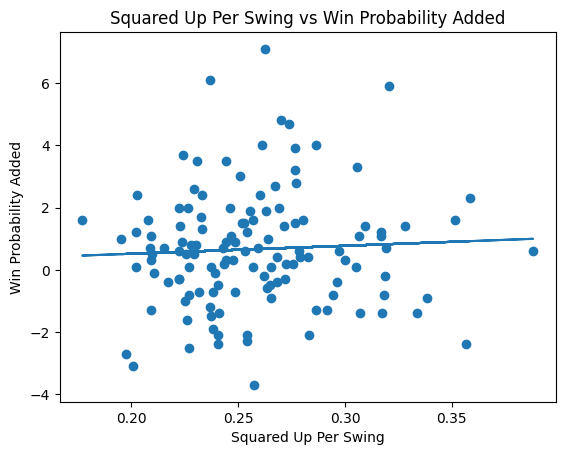

In [19]:
#create a scatter plot of sq% vs WPA
a,b = np.polyfit(players['sq'], players['wpa'],1)
x = np.array(players['sq'])
plt.scatter(players['sq'], players['wpa'])
plt.plot(x, a*x+b)
plt.xlabel('Squared Up Per Swing')
plt.ylabel('Win Probability Added')
plt.title('Squared Up Per Swing vs Win Probability Added')
plt.show()

#No correlation between SQ% and WPA

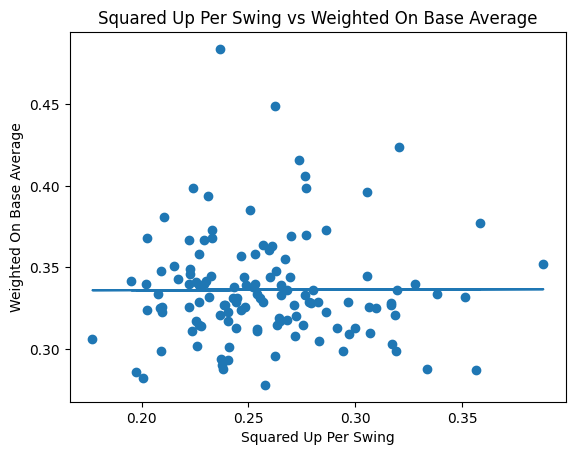

In [20]:
#create a scatter plot of sq% vs rOBA
a,b = np.polyfit(players['sq'], players['roba'],1)
x = np.array(players['sq'])
plt.scatter(players['sq'], players['roba'])
plt.plot(x, a*x+b)
plt.xlabel('Squared Up Per Swing')
plt.ylabel('Weighted On Base Average')
plt.title('Squared Up Per Swing vs Weighted On Base Average')
plt.show()

#No correlation between SQ% and rOBA

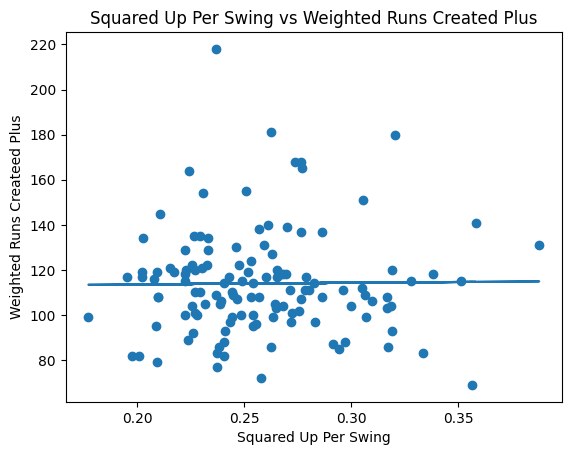

In [21]:
#create a scatter plot of sq% vs wRC+
a,b = np.polyfit(players['sq'], players['wrc'],1)
x = np.array(players['sq'])
plt.scatter(players['sq'], players['wrc'])
plt.plot(x, a*x+b)
plt.xlabel('Squared Up Per Swing')
plt.ylabel('Weighted Runs Createed Plus')
plt.title('Squared Up Per Swing vs Weighted Runs Created Plus')
plt.show()

#No correlation between SQ% and wRC+

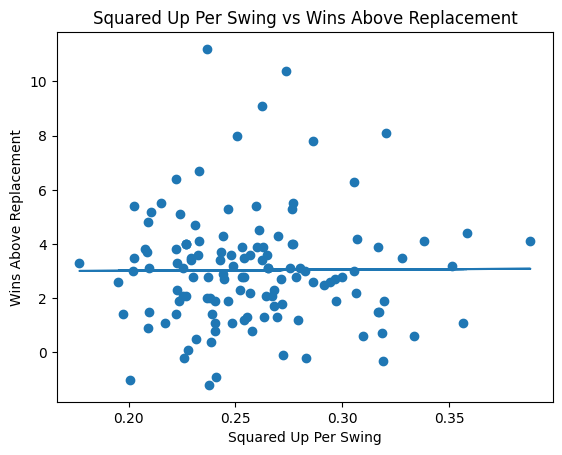

In [22]:
#create a scatter plot of sq% vs rOBA
a,b = np.polyfit(players['sq'], players['war'],1)
x = np.array(players['sq'])
plt.scatter(players['sq'], players['war'])
plt.plot(x, a*x+b)
plt.xlabel('Squared Up Per Swing')
plt.ylabel('Wins Above Replacement')
plt.title('Squared Up Per Swing vs Wins Above Replacement')
plt.show()

#No correlation between SQ% and WAR

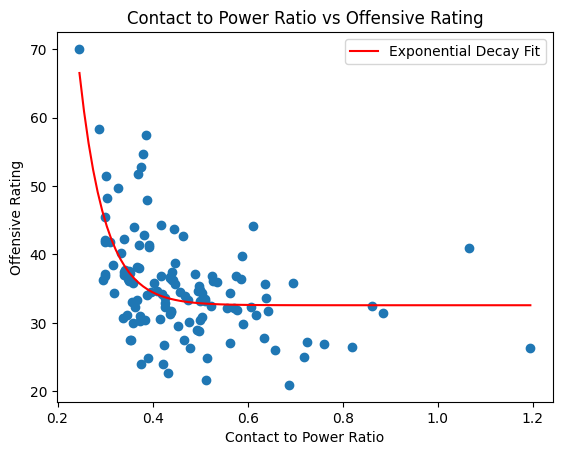

In [23]:
#create a scatter plot of hard hit percentage vs run value added
def exponential_decay(x, a, b, c):
    return a * np.exp(-b * x) + c
initial_guess = [1, 0.01, 0]
maxfev = 5000
params, covariance = opt.curve_fit(exponential_decay, players['cpr'], players['or'], p0=initial_guess, maxfev=maxfev)
x_fitted = np.linspace(min(players['cpr']), max(players['cpr']), 100)  # Create a range of x-values
y_fitted = exponential_decay(x_fitted, *params)  # Calculate the corresponding y-values using the fitted parameters
plt.scatter(players['cpr'], players['or'])  # Keep your original scatter plot
plt.plot(x_fitted, y_fitted, color='red', label='Exponential Decay Fit')  # Plot the fitted curve in red
plt.xlabel('Contact to Power Ratio')
plt.ylabel('Offensive Rating')
plt.title('Contact to Power Ratio vs Offensive Rating')
plt.legend()  # Add a legend to distinguish the scatter plot and the fitted curve
plt.show()

#high hard hit percentage not necessarily higher run value added